Week 1 Code Sample Assignment
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [1]:



import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [21]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 5
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (5678, 99999),
    '1-30 Days': (48292, 10000000),
    '31-60 Days': (6570, 7900000),
    '61-90 Days': (1000, 4500000),
    '91-120 Days': (50925, 3903000),
    '121-365': (10, 200),
    'Over 365 Days': (1000, 1000000),
    'Unapplied Payments': (-10000, -5000),
    # the are the number of invoices per bucket
    '# of Invoices': (100, 15000)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,41005.00,1600703.92,169052.26,826136.89,2407828.24,159.18,607937.31,-5958.01,9770,5652822.80,5646864.79
1,Unit 2,95350.32,626323.15,7662485.52,1369785.85,588265.81,47.94,171353.60,-8476.93,10848,10513612.19,10505135.26
2,Unit 3,74720.40,8668224.08,6577397.71,2361879.19,1176288.10,107.70,65986.54,-9511.64,875,18924603.72,18915092.08
3,Unit 4,62144.07,6030413.07,1682653.91,1944320.64,1462178.30,122.56,948936.65,-6578.83,12306,12130769.20,12124190.37
4,Unit 5,20393.83,7094823.54,1441792.65,1311239.90,1807740.78,18.83,965666.40,-7799.24,8326,12641675.93,12633876.69


In [23]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.05  # 5% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calcualte the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,5652822.80,4.666113e+06
1,Unit 2,10513612.19,9.380422e+06
2,Unit 3,18924603.72,1.733157e+07
3,Unit 4,12130769.20,1.060851e+07
4,Unit 5,12641675.93,1.110632e+07


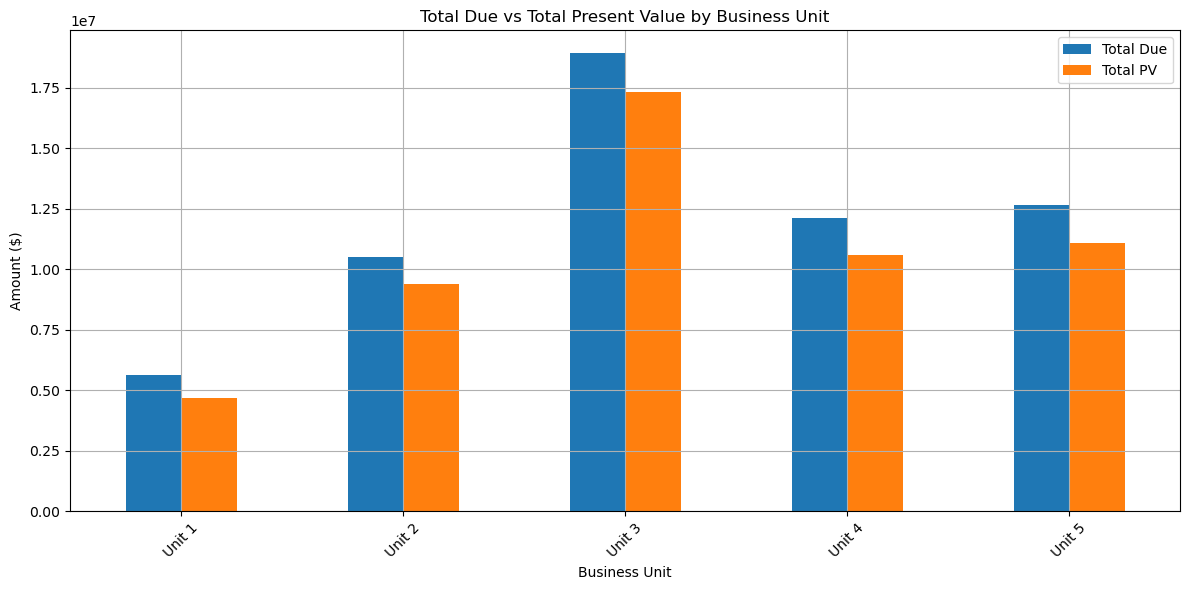

In [25]:
# lets plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()